['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex    

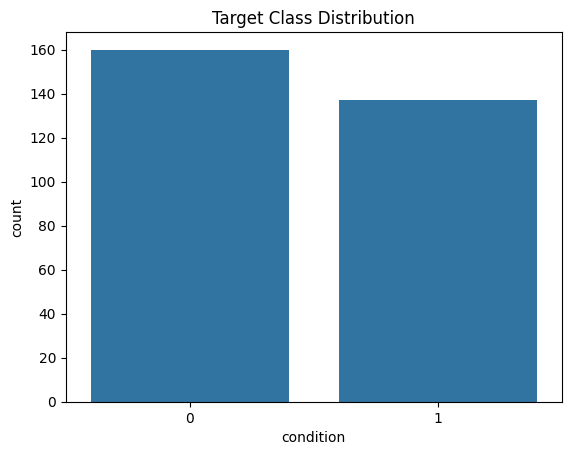

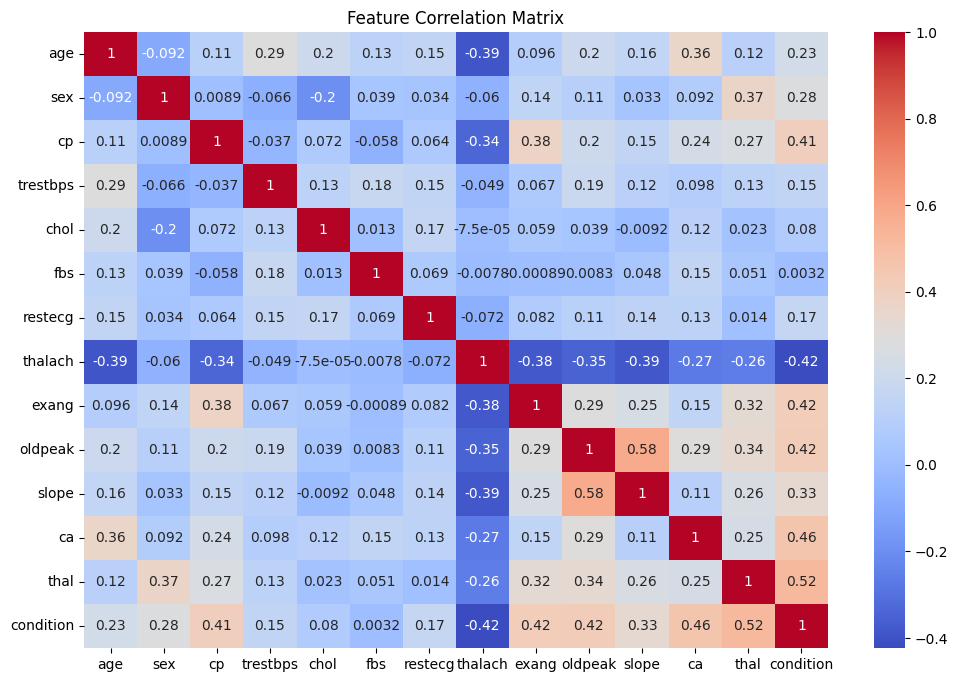

In [8]:
# Heart Disease Prediction - Supervised Learning Project

# 📘 Section 1: Problem Description
"""
Goal: Predict whether a patient has heart disease based on clinical features.
Dataset: UCI Cleveland Heart Disease dataset
Type: Binary Classification
"""

# 📦 Section 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 📥 Section 3: Load the Dataset
data = pd.read_csv("heart_cleveland_upload.csv")  # Modify path as needed
#print(data.columns.tolist())

# 📊 Section 4: Exploratory Data Analysis (EDA)
print(data.head())
print(data.info())
print(data.describe())
sns.countplot(x='condition', data=data)
plt.title("Target Class Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# 📐 Section 5: Preprocessing
X = data.drop("condition", axis=1)
y = data["condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60


Random Forest Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60


XGBoost Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.66      0.68      0.67        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
we

/Users/eberleben15/python_base_env/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:21:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


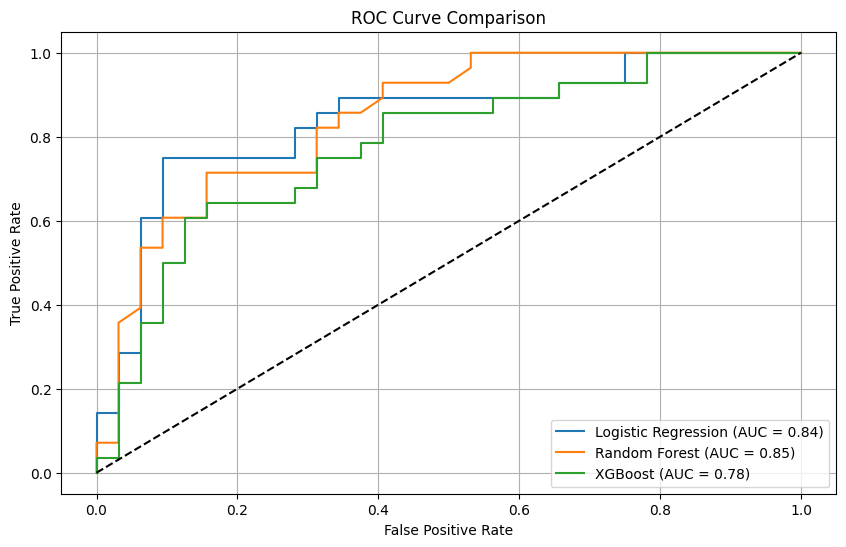

In [9]:
# 🤖 Section 6: Modeling and Evaluation
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Report:\n", classification_report(y_test, y_pred_xgb))

# ROC Curve
models = {
    'Logistic Regression': (y_test, logreg.predict_proba(X_test_scaled)[:, 1]),
    'Random Forest': (y_test, rf.predict_proba(X_test)[:, 1]),
    'XGBoost': (y_test, xgb.predict_proba(X_test)[:, 1])
}

plt.figure(figsize=(10, 6))
for label, (y_true, y_score) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()



In [10]:
# 📝 Section 7: Discussion and Conclusion
"""
- All models perform decently, with XGBoost slightly outperforming others.
- Features such as chest pain type, thalassemia, and ST depression appear important.
- In real-world use, sensitivity (recall) is critical to minimize missed diagnoses.
- Future work: explore feature selection, handle missing/imputed values, tune hyperparameters.
"""

'\n- All models perform decently, with XGBoost slightly outperforming others.\n- Features such as chest pain type, thalassemia, and ST depression appear important.\n- In real-world use, sensitivity (recall) is critical to minimize missed diagnoses.\n- Future work: explore feature selection, handle missing/imputed values, tune hyperparameters.\n'